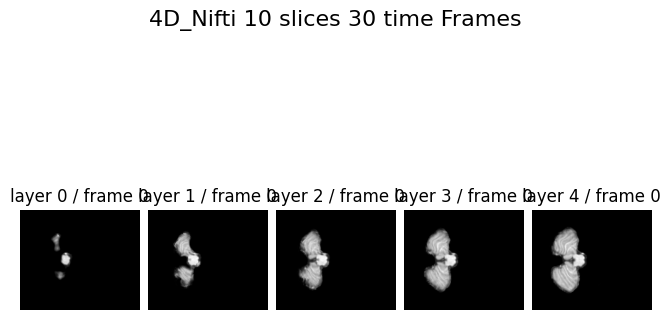

In [8]:
#==================================

number_of_frames, number_of_slices = 1, 5
fig, ax = plt.subplots(number_of_frames, number_of_slices,constrained_layout=True)
# fig.canvas.set_window_title('4D Nifti Image')
fig.suptitle('4D_Nifti 10 slices 30 time Frames', fontsize=16)
#-------------------------------------------------------------------------------
mng = plt.get_current_fig_manager()
mng.full_screen_toggle()

for slice in range(number_of_slices):
    # if your data in 4D, otherwise remove this loop
    for frame in range(number_of_frames):
        ax[slice].imshow(nii_data[:,:,slice * 2],cmap='gray', interpolation=None)
        ax[slice].set_title("layer {} / frame {}".format(slice, frame))
        ax[slice].axis('off')

plt.show() 

In [12]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

def get_nii_data(path):
    
    #==================================
    # load image (4D) [X,Y,Z_slice,time]
    nii_img  = nib.load(path)
    nii_data = nii_img.get_fdata()
    print(nii_data.shape)
    return nii_data

def plot_nii_data(nii_data):
    number_of_frames, number_of_slices = 1, 5
    fig, ax = plt.subplots(number_of_frames, number_of_slices,constrained_layout=True)
    # fig.canvas.set_window_title('4D Nifti Image')
    fig.suptitle('4D_Nifti 10 slices 30 time Frames', fontsize=16)
    #-------------------------------------------------------------------------------
    mng = plt.get_current_fig_manager()
    mng.full_screen_toggle()

    for slice in range(number_of_slices):
        # if your data in 4D, otherwise remove this loop
        for frame in range(number_of_frames):
            ax[slice].imshow(nii_data[:,:,slice * 2],cmap='gray', interpolation=None)
            ax[slice].set_title("layer {} / frame {}".format(slice, frame))
            ax[slice].axis('off')

    plt.show() 

SyntaxError: incomplete input (3522457435.py, line 14)

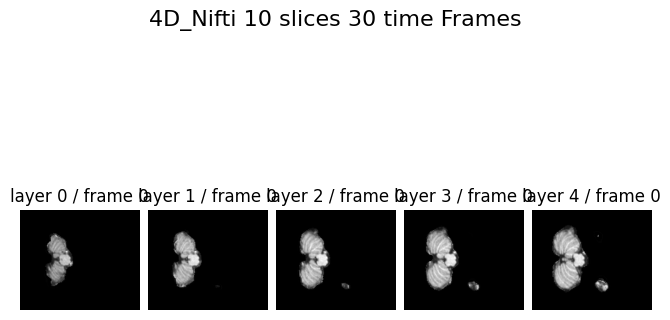

In [11]:
#==================================
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
#==================================
# load image (4D) [X,Y,Z_slice,time]
nii_img  = nib.load('./data/OAS1_0002_MR1/brain.nii.gz')
nii_data = nii_img.get_fdata()
nii_data.shape


